In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
import pprint 
import seaborn as sns
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
# import sentiment and graph data
sentiment_df_dtypes = {'id':'str', 'author':'str', 'score':'float', 'upvote_ratio':'float', 'num_comments':'int',
       'subreddit':'str', 'selftext':'str', 'comments':'object', 'post_sentiment_dict':'object',
       'post_pos_sentiment':'float', 'post_neg_sentiment':'float', 'post_compound_sentiment':'float'}
# change path as per your drive 
berkeley_sentiment_df = pd.read_csv('processed_data/berkeley/berkeley_sentiment_new.csv', dtype=sentiment_df_dtypes, usecols=sentiment_df_dtypes.keys())


In [ ]:
berkeley_sentiment_df

,id,author,score,upvote_ratio,num_comments,subreddit,selftext,comments,post_sentiment_dict,post_pos_sentiment,post_neg_sentiment,post_compound_sentiment
0,jryusf,yoyoyaass,374.0,0.97,43,berkeley,😙✌️ who else feels?,"[{'author': 'buckyspunisher', 'body': 'Haha ye...","{'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'comp...",0.456,0.000,0.7717
1,12825pi,yogurtchicken21,434.0,0.99,29,berkeley,Not my picture,"[{'author': 'compstomper1', 'body': 'or flying...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
2,p88cbe,ylc217,417.0,0.82,137,berkeley,I’m probably going to get downvoted for this b...,"[{'author': 'BrainyCardinal45', 'body': '@Deba...","{'neg': 0.041, 'neu': 0.705, 'pos': 0.254, 'co...",0.254,0.041,0.9933
3,10ygfry,yapoyt,411.0,0.95,74,berkeley,I just got into Cal early with a regents and c...,"[{'author': 'Money_Equivalent6439', 'body': 'A...","{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.213,0.000,0.9500
4,wgjc64,xosarasparklesxo,371.0,0.99,41,berkeley,"I hopped on AC 52 on Bancroft, headed away fro...","[{'author': 'Important_Ad_3688', 'body': 'This...","{'neg': 0.074, 'neu': 0.91, 'pos': 0.016, 'com...",0.016,0.074,-0.8477
...,...,...,...,...,...,...,...,...,...,...,...,...
333,pbqj3b,712588Kf,342.0,0.99,24,berkeley,I couldn’t afford to pay the $130 for my Chem ...,"[{'author': 'sunoosupremacy', 'body': 'that is...","{'neg': 0.067, 'neu': 0.834, 'pos': 0.099, 'co...",0.099,0.067,0.4795
334,p0tx3l,712588Kf,341.0,0.97,21,berkeley,I can’t wait for me to be living in my apartme...,"[{'author': 'PotentiallyExplosive', 'body': ""i...","{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",0.073,0.000,0.6956
335,prcxvy,712588Kf,333.0,0.98,20,berkeley,This means a lot to me considering I was a rea...,"[{'author': 'LugnutsK', 'body': 'B for Berkele...","{'neg': 0.071, 'neu': 0.929, 'pos': 0.0, 'comp...",0.000,0.071,-0.2831
336,gi3j9s,31makeitmakesense,639.0,0.93,185,berkeley,"This year, Berkeley's [top graduate](https://n...","[{'author': 'gotransfersgobears', 'body': ""The...","{'neg': 0.048, 'neu': 0.861, 'pos': 0.091, 'co...",0.091,0.048,0.8948


In [ ]:
berkeley_sentiment_df['comments'] = berkeley_sentiment_df['comments'].apply(lambda x: eval(x))
# berkeley_sentiment_df['comment_sentiment_list'] = berkeley_sentiment_df['comment_sentiment_list'].apply(lambda x: eval(x))
berkeley_sentiment_df['post_sentiment_dict'] = berkeley_sentiment_df['post_sentiment_dict'].apply(lambda x: eval(x))

In [ ]:
berkeley_sentiment_df.columns

Index(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext', 'comments', 'post_sentiment_dict', 'post_pos_sentiment',
       'post_neg_sentiment', 'post_compound_sentiment'],
      dtype='object')

In [ ]:
# import centrality data
centrality_df_dtype = {'author':'str', 'btw_centrality':'float', 'deg_centrality':'float',
       'eig_centrality':'float', 'pagerank':'float', 'clustering_coeff':'float'}
berkeley_centrality_df = pd.read_csv('processed_data/berkeley/berkeley_centrality_poster.csv', dtype=centrality_df_dtype, usecols=centrality_df_dtype.keys())

In [ ]:
berkeley_regression_df = berkeley_sentiment_df[['author', 'post_pos_sentiment', 'post_neg_sentiment', 'num_comments',
       'post_compound_sentiment', 'upvote_ratio']].merge(berkeley_centrality_df, on='author', how='left')

In [ ]:
berkeley_regression_df

,author,post_pos_sentiment,post_neg_sentiment,num_comments,post_compound_sentiment,upvote_ratio,btw_centrality,deg_centrality,eig_centrality,pagerank,clustering_coeff
0,yoyoyaass,0.456,0.000,43,0.7717,0.97,0.004013,0.005352,0.034852,0.000167,0.038306
1,yogurtchicken21,0.000,0.000,29,0.0000,0.99,0.003474,0.004349,0.030464,0.000167,0.036923
2,ylc217,0.254,0.041,137,0.9933,0.82,0.008372,0.010370,0.046298,0.000167,0.016393
3,yapoyt,0.213,0.000,74,0.9500,0.95,0.013246,0.010871,0.029187,0.000167,0.000962
4,xosarasparklesxo,0.016,0.074,41,-0.8477,0.99,0.001975,0.003847,0.026871,0.000167,0.019763
...,...,...,...,...,...,...,...,...,...,...,...
333,712588Kf,0.099,0.067,24,0.4795,0.99,0.010548,0.014216,0.059700,0.000167,0.012605
334,712588Kf,0.073,0.000,21,0.6956,0.97,0.010548,0.014216,0.059700,0.000167,0.012605
335,712588Kf,0.000,0.071,20,-0.2831,0.98,0.010548,0.014216,0.059700,0.000167,0.012605
336,31makeitmakesense,0.091,0.048,185,0.8948,0.93,0.009727,0.010202,0.037159,0.000167,0.008743


In [ ]:
berkeley_regression_avg_df = berkeley_regression_df.groupby('eig_centrality').mean()

<ipython-input-94-7a314f1c2971>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  berkeley_regression_avg_df = berkeley_regression_df.groupby('eig_centrality').mean()


In [ ]:
berkeley_regression_avg_df = berkeley_regression_avg_df.reset_index()

In [ ]:
# fit a univariate regression model
def fit_regression_line(y, X, regressor):
  model = sm.OLS(y, X)
  results = model.fit()

  param = results.params
  fitted = np.transpose(X) * param

  fig, ax = plt.subplots(figsize=(8,4))
  plt.plot(X, y, 'o')
  plt.plot(X, fitted ,'-', label='coefficient: ' + str(round(param[0], 2)))
  ax.set_xlabel(regressor)
  ax.set_ylabel('post_pos_sentiment')
  plt.legend()
  plt.show()

In [ ]:
def fit_regression_line_intercept(y, X, regressor):
    X = sm.add_constant(X)  # adding a constant term for intercept
    model = sm.OLS(y, X)
    results = model.fit()

    param = results.params
    fitted = np.dot(X, param)

    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(X[:, 1], y, 'o')  # X[:, 1] since X[:, 0] is the constant term
    plt.plot(X[:, 1], fitted ,'-', label='intercept: ' + str(round(param[0], 2)) +
                                        ', coefficient: ' + str(round(param[1], 2)))
    ax.set_xlabel(regressor)
    ax.set_ylabel('post_pos_sentiment')
    plt.legend()
    plt.show()



---



### eig_centrality vs post_pos_sentiment 
Model : 
<!-- $y_{agg-pos-comment-sentiment} = \beta_0 + \beta_1 \cdot X_{eig-centrality} + \beta_2 \cdot X_{post-pos-sentiment} + \beta_3 \cdot X_{num-comments} + \epsilon $
Here, we control for the post positive sentiment to make sure that the comment sentiment is not being driven by the fact that the user posted something positive which is leading other users to comment a certain way. We also control for the number of comments, since the change aggregated comment sentiment may be driven by the number of comments the post has.  -->

In [ ]:
berkeley_regression_avg_df.columns

Index(['eig_centrality', 'post_pos_sentiment', 'post_neg_sentiment',
       'num_comments', 'post_compound_sentiment', 'upvote_ratio',
       'btw_centrality', 'deg_centrality', 'pagerank', 'clustering_coeff'],
      dtype='object')

In [ ]:
# for all values of eig_centrality
X = berkeley_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = berkeley_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4200
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.739
Time:                        17:50:18   Log-Likelihood:                 206.20
No. Observations:                 279   AIC:                            -404.4
Df Residuals:                     275   BIC:                            -389.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1574      0.140      1.123      0.2

In [ ]:
# for all values of eig_centrality
berkeley_regression_avg_df['ln_eig_centrality'] = np.log(berkeley_regression_avg_df['eig_centrality'])
X = berkeley_regression_avg_df[['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = berkeley_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.638
Date:                Sun, 04 Jun 2023   Prob (F-statistic):            0.00351
Time:                        17:50:22   Log-Likelihood:                 212.45
No. Observations:                 279   AIC:                            -416.9
Df Residuals:                     275   BIC:                            -402.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0810      0.138      0.588      0.5

In [ ]:
# for all values of eig_centrality
berkeley_regression_avg_df['ln_eig_centrality'] = np.log(berkeley_regression_avg_df['eig_centrality'])
X = berkeley_regression_avg_df[['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = berkeley_regression_avg_df['post_compound_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.558
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.200
Time:                        17:59:39   Log-Likelihood:                -294.67
No. Observations:                 279   AIC:                             597.3
Df Residuals:                     275   BIC:                             611.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4162      0.848     -1.670      0.0

In [ ]:
# removing outliers, i.e., very few users which have very high eigenvector centrality
X = berkeley_regression_avg_df[berkeley_regression_avg_df['eig_centrality'] < 0.15][['eig_centrality', 'num_comments', 'upvote_ratio']].values
y = berkeley_regression_avg_df[berkeley_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.837
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.141
Time:                        17:50:31   Log-Likelihood:                 205.93
No. Observations:                 277   AIC:                            -403.9
Df Residuals:                     273   BIC:                            -389.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2316      0.144      1.606      0.1

In [ ]:
# removing outliers, i.e., very few users which have very high eigenvector centrality
X = berkeley_regression_avg_df[berkeley_regression_avg_df['eig_centrality'] < 0.15][['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = berkeley_regression_avg_df[berkeley_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     4.881
Date:                Sun, 04 Jun 2023   Prob (F-statistic):            0.00254
Time:                        17:50:34   Log-Likelihood:                 210.40
No. Observations:                 277   AIC:                            -412.8
Df Residuals:                     273   BIC:                            -398.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0775      0.138      0.561      0.5

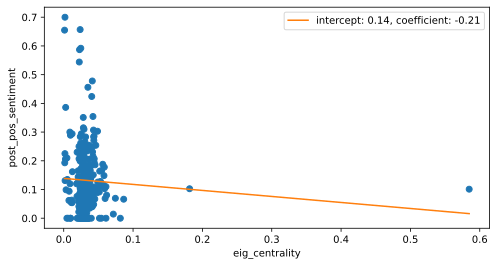

In [ ]:
fit_regression_line_intercept(berkeley_regression_avg_df['post_pos_sentiment'].values, berkeley_regression_avg_df['eig_centrality'].values, 'eig_centrality')

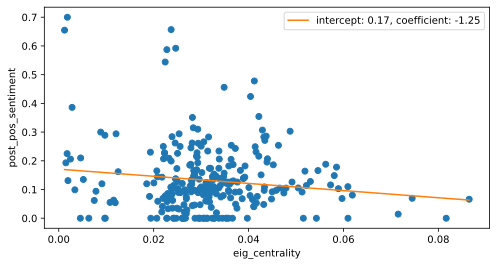

In [ ]:
fit_regression_line_intercept(berkeley_regression_avg_df[berkeley_regression_avg_df['eig_centrality'] < 0.15]['post_pos_sentiment'].values, berkeley_regression_avg_df[berkeley_regression_avg_df['eig_centrality'] < 0.15]['eig_centrality'].values, 'eig_centrality')

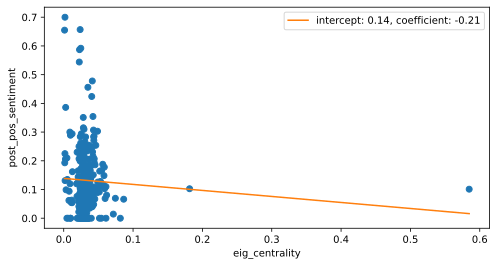

In [ ]:
fit_regression_line_intercept(berkeley_regression_avg_df['post_pos_sentiment'].values, berkeley_regression_avg_df['eig_centrality'].values, 'eig_centrality')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = berkeley_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [ ]:
vif

,VIF,variable
0,6.937843,eig_centrality
1,1.178555,num_comments
2,6.623351,upvote_ratio


Here, we observe that after removing outliers there is a positive correlation between eigenvector centrality and the aggregated positive comment sentiment implying that users with a higher eigenvector centrality on average receive comments on their post which are more positive. We can interpret this as more well connected users getting more perceived social support from their peers. 


---



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = berkeley_regression_avg_df[['eig_centrality', 'num_comments', 'upvote_ratio', 'btw_centrality', 'deg_centrality', 'clustering_coeff']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [ ]:
vif

,VIF,variable
0,25.002768,eig_centrality
1,2.003443,num_comments
2,6.650829,upvote_ratio
3,10.081906,btw_centrality
4,13.211123,deg_centrality
5,2.435024,clustering_coeff


### deg_centrality vs post_pos_sentiment
<!-- Model : 
$y_{agg-pos-comment-sentiment} = \beta_0 + \beta_1 \cdot X_{deg-centrality} + \beta_2 \cdot X_{post-pos-sentiment} + \beta_3 \cdot X_{num-comments} + \epsilon $
Here, we control for the post positive sentiment to make sure that the comment sentiment is not being driven by the fact that the user posted something positive which is leading other users to comment a certain way.  -->

(array([29., 42., 38., 36., 37., 30., 20., 12.,  8.,  3.,  3.,  2.,  2.,
         1.,  2.,  1.,  0.,  4.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00083626, 0.00201037, 0.00318448, 0.00435859, 0.0055327 ,
        0.00670681, 0.00788092, 0.00905503, 0.01022914, 0.01140324,
        0.01257735, 0.01375146, 0.01492557, 0.01609968, 0.01727379,
        0.0184479 , 0.01962201, 0.02079612, 0.02197023, 0.02314434,
        0.02431845, 0.02549256, 0.02666667, 0.02784078, 0.02901489,
        0.03018899, 0.0313631 , 0.03253721, 0.03371132, 0.03488543,
        0.03605954, 0.0372

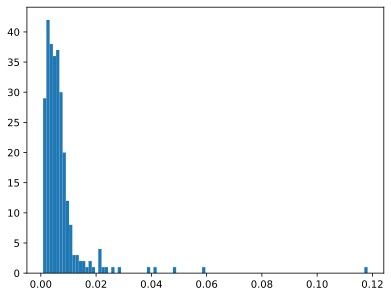

In [ ]:
plt.hist(berkeley_regression_avg_df['deg_centrality'].values, bins= 100)

In [ ]:
# for all values of eig_centrality
X = berkeley_regression_avg_df[['deg_centrality', 'num_comments', 'upvote_ratio']].values
y = berkeley_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5100
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.676
Time:                        17:51:01   Log-Likelihood:                 206.34
No. Observations:                 279   AIC:                            -404.7
Df Residuals:                     275   BIC:                            -390.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1649      0.141      1.173      0.2

In [ ]:
# for all values of eig_centrality
berkeley_regression_avg_df['ln_deg_centrality'] = np.log(berkeley_regression_avg_df['deg_centrality'])
X = berkeley_regression_avg_df[['ln_deg_centrality', 'num_comments', 'upvote_ratio']].values
y = berkeley_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.170
Date:                Sun, 04 Jun 2023   Prob (F-statistic):             0.0919
Time:                        17:32:41   Log-Likelihood:                 208.83
No. Observations:                 279   AIC:                            -409.7
Df Residuals:                     275   BIC:                            -395.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0942      0.140      0.674      0.5

We still get an $R^2 = 0.355$ , and we get a positive statistically significant $\beta_1$ which implies that well connected users get higher perceived social support from their peers. 

In [ ]:
# removing outliers, i.e., very few users which have very high degree centrality
X = berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02][['deg_centrality', 'num_comments', 'upvote_ratio']].values
y = berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.244
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.294
Time:                        17:32:46   Log-Likelihood:                 194.19
No. Observations:                 266   AIC:                            -380.4
Df Residuals:                     262   BIC:                            -366.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2886      0.171      1.691      0.0

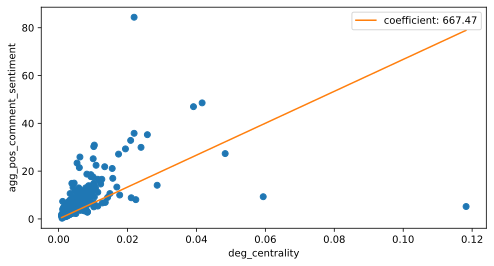

In [ ]:
# full data 
# fit_regression_line(berkeley_regression_avg_df['agg_pos_comment_sentiment'].values, berkeley_regression_avg_df['deg_centrality'].values, 'deg_centrality')

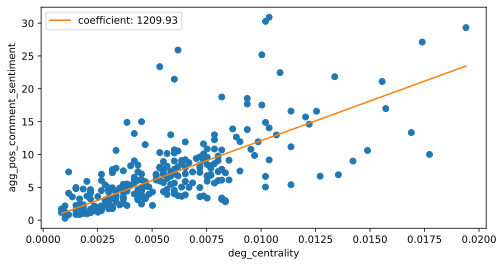

In [ ]:
# removing outliers 
# fit_regression_line(y, berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['deg_centrality'].values, 'deg_centrality')

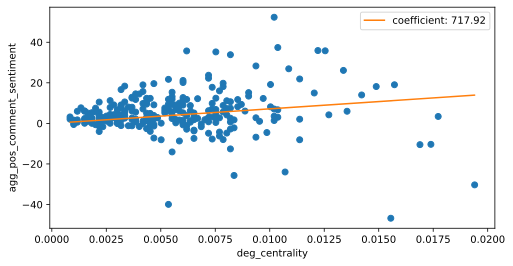

In [ ]:
# fit_regression_line(berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['agg_compound_comment_sentiment'].values, berkeley_regression_avg_df[berkeley_regression_avg_df['deg_centrality'] < 0.02]['deg_centrality'].values, 'deg_centrality')

### Computing VIF to check for multi-collinearity 

Clustering coefficient

In [ ]:
# for all values of eig_centrality
X = berkeley_regression_avg_df[['clustering_coeff', 'num_comments', 'upvote_ratio']].values
y = berkeley_regression_avg_df['post_pos_sentiment'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1185
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.949
Time:                        17:33:19   Log-Likelihood:                 205.75
No. Observations:                 279   AIC:                            -403.5
Df Residuals:                     275   BIC:                            -389.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1372      0.141      0.975      0.3